In [1]:
import numpy
import os
import save_load_file as slf

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib 

In [2]:
sim_set = "square" # basically is the name of the folder where the data is read/saved
base_dir = "BaxterArm_VREP_simulation_data"

In [23]:
square=slf.load_from_file(base_dir+"/"+sim_set+"/"+"square.pickle")

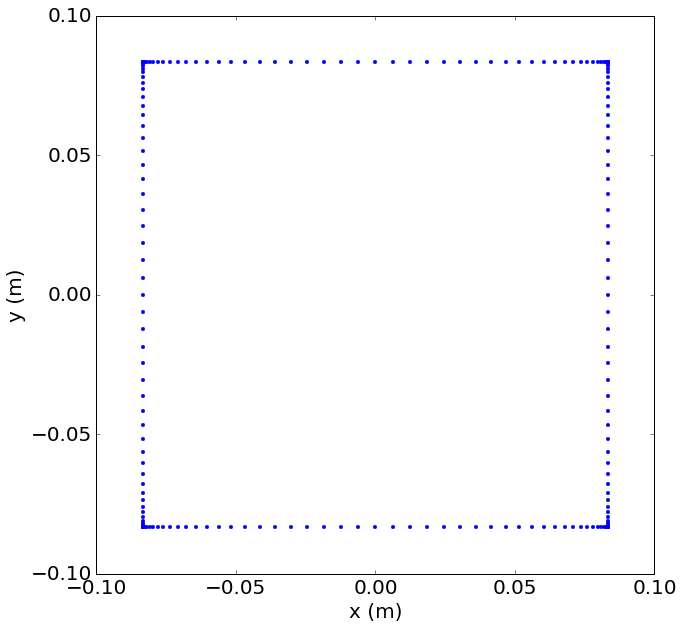

In [24]:
font = {'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

plt.figure(figsize =(10,10))

plt.plot(square[::5,0],square[::5,1],'.',markersize=7)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
# plt.subplots_adjust(left=0, bottom=.1, right=1, top=1,wspace=.2, hspace=.5)
# plt.savefig(os.getcwd()+"/"+"initial_shapes.pdf", bbox_inches='tight',pad_inches=.1)
plt.show()

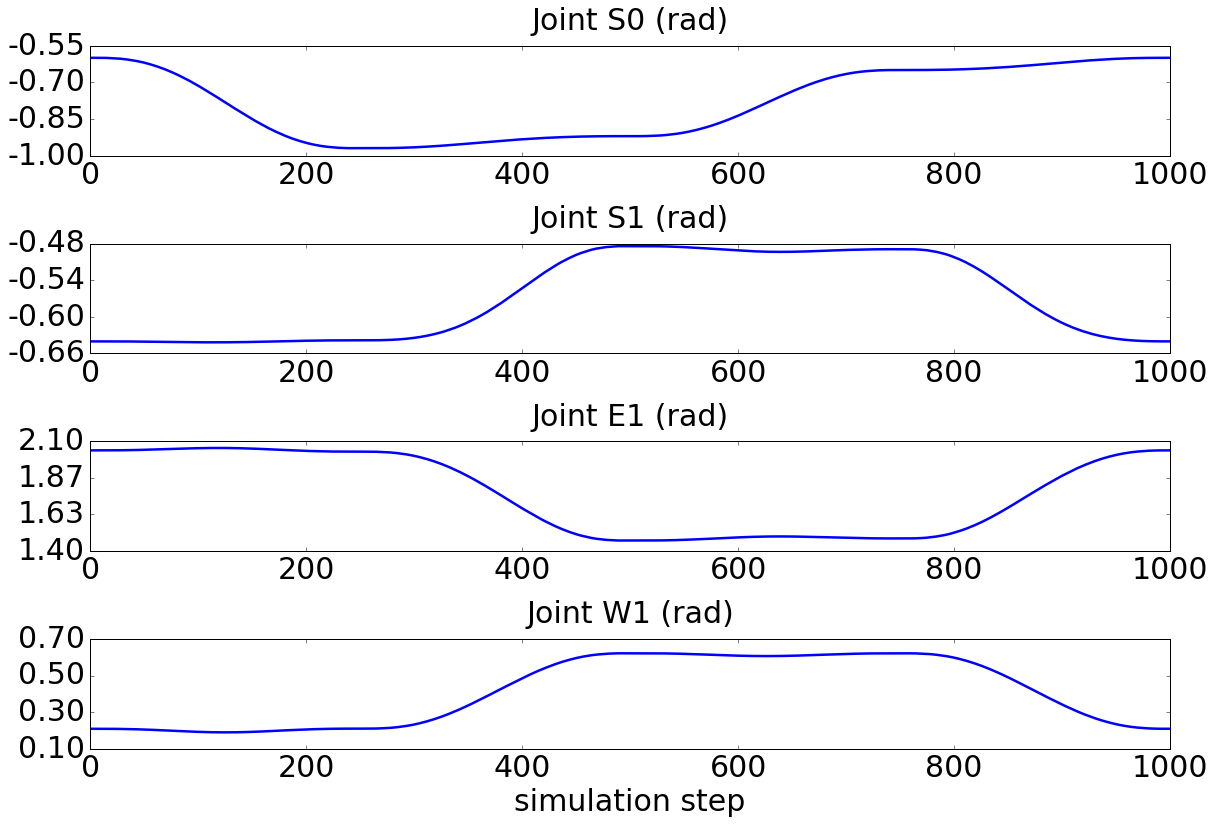

In [25]:
# 
# Defines which shape is going to be used to generate the figures
#

import matplotlib.ticker as ticker

joint_positions=numpy.load(base_dir+"/"+sim_set+"/XY_movement_"+sim_set+".npy")


font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

#
# Plots the original curves
#
fig=plt.figure(figsize =(15,20))

# plt.subplot(7,1,1)
# plt.plot(XY_movement[shape_i][:,0],XY_movement[shape_i][:,1])
# plt.title("X and Y")
ax = []

ax.append(plt.subplot(7,1,4))
ax[-1].plot(joint_positions[:,0],'-',linewidth=2.5)
ax[-1].set_xlim([0,len(joint_positions)])
ax[-1].set_title("Joint S0 (rad)",fontdict={'fontsize':30})
ax[-1].title.set_y(1.1)
ax[-1].tick_params(axis='both', pad=5, labelsize=30)
start, end = ax[-1].get_ylim()
ax[-1].yaxis.set_ticks(numpy.linspace(start, end, num=4))
ax[-1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

ax.append(plt.subplot(7,1,5))
ax[-1].plot(joint_positions[:,1],'-',linewidth=2.5)
ax[-1].set_xlim([0,len(joint_positions)])
ax[-1].set_title("Joint S1 (rad)",fontdict={'fontsize':30})
ax[-1].title.set_y(1.1)
ax[-1].tick_params(axis='both', pad=5, labelsize=30)
start, end = ax[-1].get_ylim()
ax[-1].yaxis.set_ticks(numpy.linspace(start, end, num=4))
ax[-1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

ax.append(plt.subplot(7,1,6))
ax[-1].plot(joint_positions[:,2],'-',linewidth=2.5)
ax[-1].set_xlim([0,len(joint_positions)])
ax[-1].set_title("Joint E1 (rad)",fontdict={'fontsize':30})
ax[-1].title.set_y(1.1)
ax[-1].tick_params(axis='both', pad=5, labelsize=30)
start, end = ax[-1].get_ylim()
ax[-1].yaxis.set_ticks(numpy.linspace(start, end, num=4))
ax[-1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

ax.append(plt.subplot(7,1,7))
ax[-1].plot(joint_positions[:,3],'-',linewidth=2.5)
ax[-1].set_xlim([0,len(joint_positions)])
ax[-1].set_title("Joint W1 (rad)",fontdict={'fontsize':30})
ax[-1].title.set_y(1.1)
ax[-1].tick_params(axis='both', pad=5, labelsize=30)
start, end = ax[-1].get_ylim()
ax[-1].yaxis.set_ticks(numpy.linspace(start, end, num=4))
ax[-1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

ax[-1].set_xlabel("simulation step", labelpad=5, fontdict={'fontsize':30})

plt.subplots_adjust(left=0, bottom=.1, right=1, top=1, wspace=.2, hspace=.8)
plt.savefig(os.getcwd()+"/"+"example_joints.pdf", bbox_inches='tight',pad_inches=.1)
plt.show()

In [26]:
all_experiments = ["_ROB_0", "", "_ROB_10", "_ROB_20", "_ROB_30", "_ROB_40", "_ROB_50", "_ROB_60", "_ROB_70"\
                   , "_ROB_80", "_ROB_90", "_ROB_100"]
# 0: '_ROB_0' => almost no noise
# 1: "" => original noise (1nA)
# 2: '_ROB_10'   =>  10% increase in noise
# 3: '_ROB_20'   =>  20% increase in noise
# 4: '_ROB_30'   =>  30% increase in noise
# 5: '_ROB_40'   =>  40% increase in noise
# 6: '_ROB_50'   =>  50% increase in noise
# 7: '_ROB_60'   =>  60% increase in noise
# 8: '_ROB_70'   =>  70% increase in noise
# 9: '_ROB_80'   =>  80% increase in noise
# 10: '_ROB_90'  =>  90% increase in noise
# 11: '_ROB_100' => 100% increase in noise


total_trials = 100

In [56]:
extra_name_r=all_experiments[11]

extra_name = "_Maass_Parallel"
# extra_name = ""

extra_name = extra_name+extra_name_r

simulation_type = "parallel"

lsm_i = "ALL"

xyz_pos = []
for trial_number in range(total_trials):
    filename = "./"+base_dir+"/"+sim_set+"/baxter_xyz_joint_angles_mean_"+simulation_type+"_"+\
               str(lsm_i)+"_"+str(trial_number)+extra_name+"_VREP.npy"
    xyz_pos.append(numpy.load(filename))

xyz_pos = numpy.array(xyz_pos)

# Translates to match the original initial value (as the simulations always start at that value)
xyz_pos[:,:,0]+=-xyz_pos[0,0,0]+square[0,0]
xyz_pos[:,:,1]+=-xyz_pos[0,0,1]+square[0,1]
xyz_pos[:,:,2]+=-xyz_pos[0,0,2]


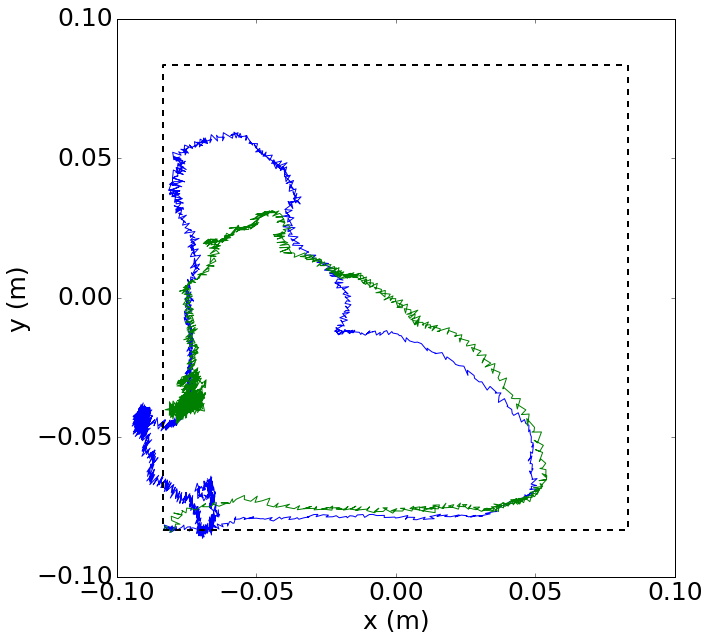

2


In [57]:
font = {'weight' : 'normal',
        'size'   : 25}

matplotlib.rc('font', **font)

count_good = []
plt.figure(figsize =(10,10))
for i in range(len(xyz_pos)):
    if (xyz_pos[i,:,0]).max()>0.05 and (xyz_pos[i,:,1]).max()>0.00 and i!=4:
        count_good.append(i)
        plt.plot(xyz_pos[i,:,0],xyz_pos[i,:,1])
plt.plot(square[:,0],square[:,1],'k--',linewidth=2)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
# plt.title("Cartesian Movement Generated by Baxter (all trials) - "+simulation_type)
# plt.savefig(os.getcwd()+"/"+"final_xy_good_"+str(len(count_good))+"_"+extra_name+".pdf", bbox_inches='tight',pad_inches=.1)
plt.show()
print len(count_good)

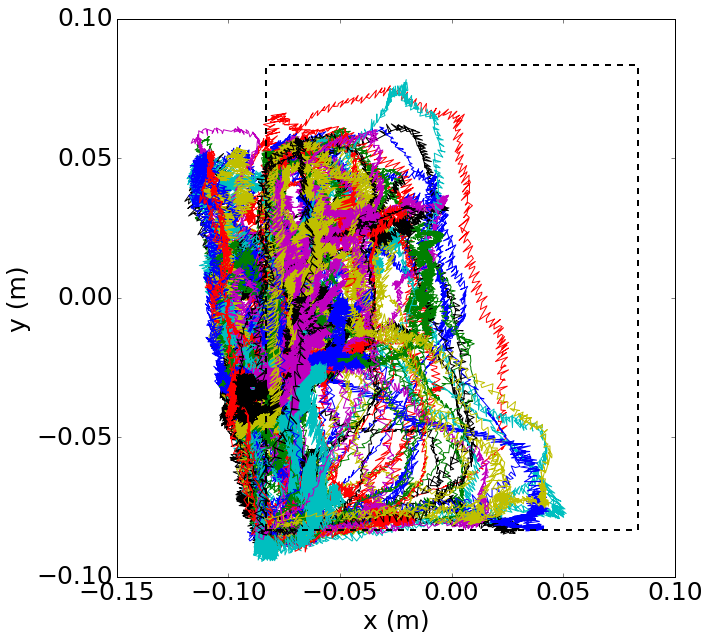

In [58]:
font = {'weight' : 'normal',
        'size'   : 25}

matplotlib.rc('font', **font)

plt.figure(figsize =(10,10))
for i in range(len(xyz_pos)):
    if i not in count_good:
        plt.plot(xyz_pos[i,:,0],xyz_pos[i,:,1])
plt.plot(square[:,0],square[:,1],'k--',linewidth=2)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
# plt.title("Cartesian Movement Generated by Baxter (all trials) - "+simulation_type)
# plt.savefig(os.getcwd()+"/"+"final_xy_bad_"+str(total_trials-len(count_good))+"_"+extra_name+".pdf", bbox_inches='tight',pad_inches=.1)
plt.show()

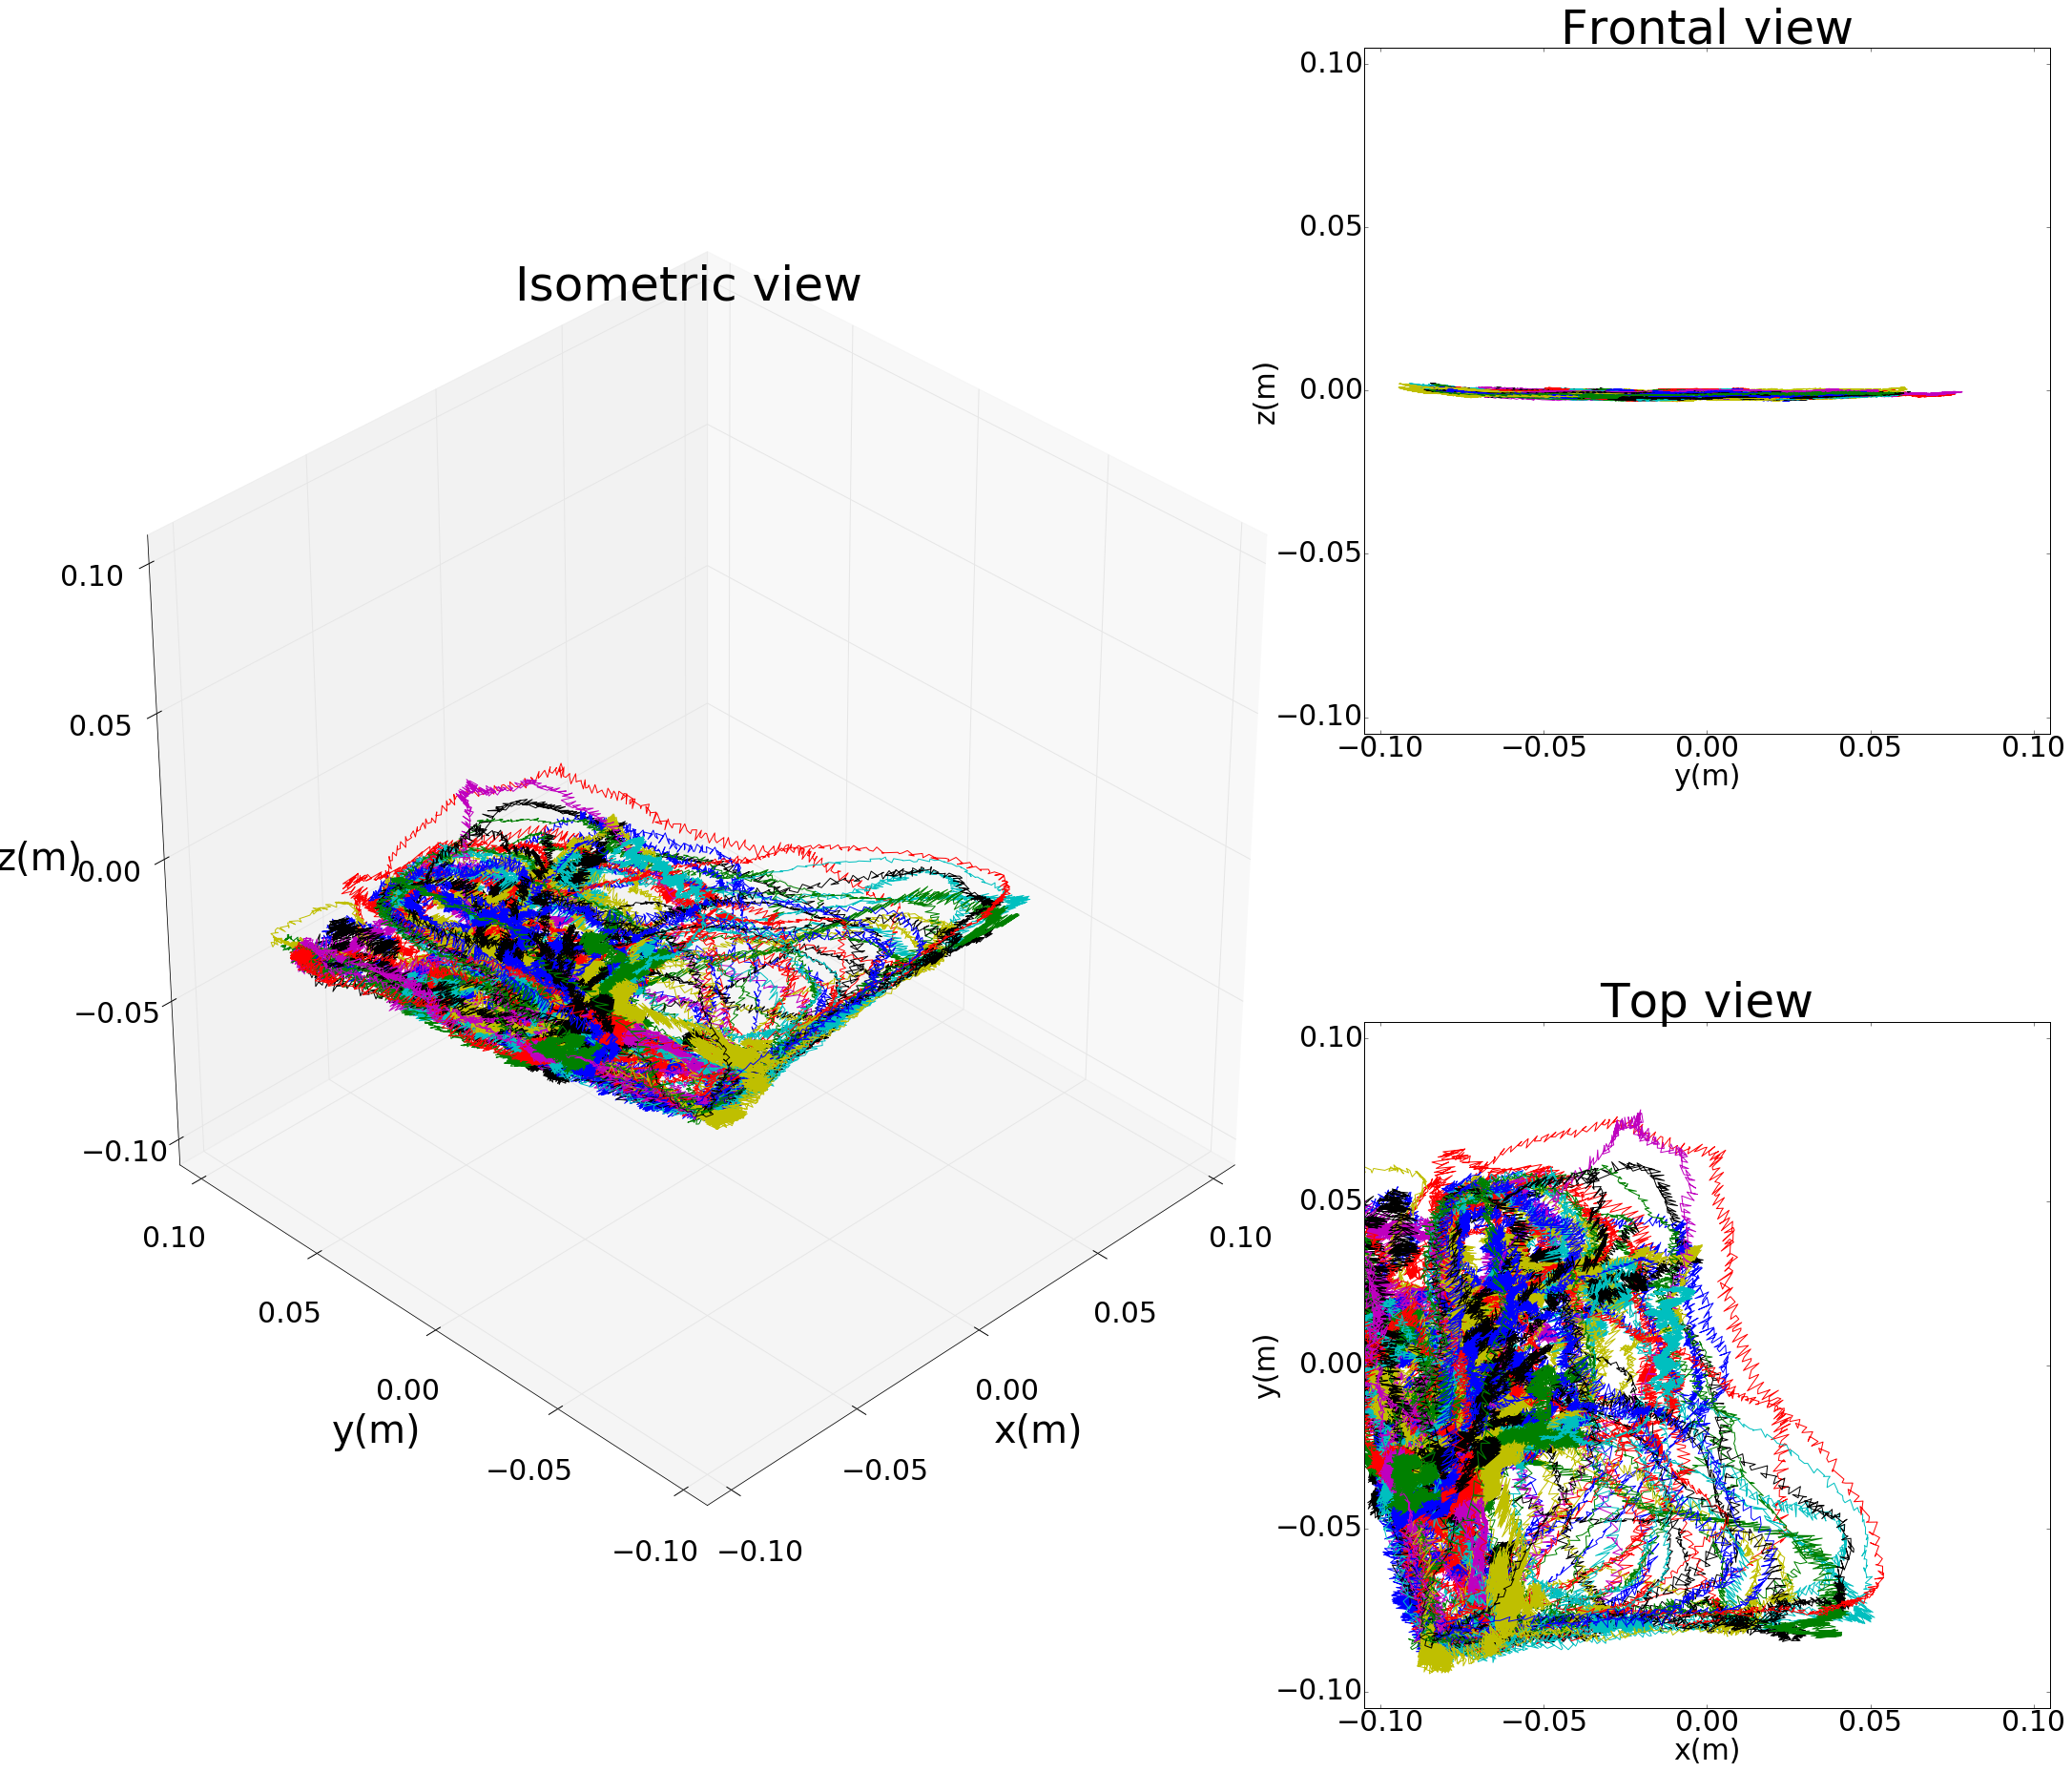

In [60]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# gs = gridspec.GridSpec(3, 3)

fig_w = 500
fig_h = 500
fig = plt.figure() # creates the figure for the following plots
fig.set_size_inches(fig_w/25.4,fig_h/25.4, forward=False) #Set the figure size in inches (1in == 2.54cm)

ax = plt.subplot2grid((2,3), (0,0), colspan=2, rowspan=2, projection='3d')
ax_z = plt.subplot2grid((2,3), (0,2))
ax_xy = plt.subplot2grid((2,3), (1,2))


# 'Isometric' view
for i in range(len(xyz_pos)):
    ax.plot(xyz_pos[i,:,0], xyz_pos[i,:,1], xyz_pos[i,:,2])

ax.tick_params(axis='x', pad=30)
ax.tick_params(axis='y', pad=30)
ax.tick_params(axis='z', pad=30)

ax.tick_params(axis='both', labelsize=30)

font_labels = {'weight' : 'normal','size'   : 40}

ax.set_xlabel('x(m)',labelpad=60, fontdict=font_labels)
ax.set_ylabel('y(m)',labelpad=60, fontdict=font_labels)
ax.set_zlabel('z(m)',labelpad=65, fontdict=font_labels)

# ax.set_title("Square")
ax.set_autoscaley_on(False)
ax.set_xlim([-0.105,0.105])
ax.set_ylim([-0.105,0.105])
ax.set_zlim([-0.105,0.105])

ax.view_init(elev=35, azim=-135)

ax.set_title("Isometric view", fontdict={'weight' : 'normal','size'   : 50})
ax.set_aspect(1)


# Frontal view
for i in range(len(xyz_pos)):
    ax_z.plot(xyz_pos[i,:,1], xyz_pos[i,:,2])
ax_z.set_autoscaley_on(False)
ax_z.set_xlim([-0.105,0.105])
ax_z.set_ylim([-0.105,0.105])
ax_z.tick_params(axis='both', pad=1, labelsize=30)
font_labels = {'weight' : 'normal','size'   : 30}
ax_z.set_xlabel('y(m)',labelpad=1, fontdict=font_labels)
ax_z.set_ylabel('z(m)',labelpad=-5, fontdict=font_labels)
ax_z.set_aspect(1)
ax_z.patch.set_alpha(0.0)
ax_z.set_title("Frontal view", fontdict={'weight' : 'normal','size'   : 50})

# Top view
for i in range(len(xyz_pos)):
    ax_xy.plot(xyz_pos[i,:,0], xyz_pos[i,:,1])
ax_xy.set_autoscaley_on(False)
ax_xy.set_xlim([-0.105,0.105])
ax_xy.set_ylim([-0.105,0.105])
ax_xy.tick_params(axis='both', pad=1, labelsize=30)
font_labels = {'weight' : 'normal','size'   : 30}
ax_xy.set_xlabel('x(m)',labelpad=1, fontdict=font_labels)
ax_xy.set_ylabel('y(m)',labelpad=-5, fontdict=font_labels)
ax_xy.set_aspect(1)
ax_xy.patch.set_alpha(0.0)
ax_xy.set_title("Top view", fontdict={'weight' : 'normal','size'   : 50})

fig.tight_layout(pad=-15, h_pad=-5, w_pad=-5)
# fig.tight_layout()

# fig.subplots_adjust(left=0,right=0.1,bottom=0,top=0.1,wspace = 5, hspace=0)

# left  = 0.125  # the left side of the subplots of the figure
# right = 0.9    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.5   # the amount of height reserved for white space between subplots

# plt.savefig(os.getcwd()+"/"+"3D_square_"+extra_name+".pdf", bbox_inches='tight',pad_inches=.1)
plt.savefig(os.getcwd()+"/"+"3D_square_"+extra_name+".png", bbox_inches='tight',pad_inches=.1, dpi=150)

plt.show()

# Dynamic Time Warping:

In [8]:
import sys
import os
import dtw_C

In [957]:
%%time

#
# CALCULATES THE DTW FOR all_experiments
#

# extra_name_ext = "_Maass_Parallel"
extra_name_ext = ""
    
simulation_type = "parallel"
lsm_i = "ALL"

for extra_name_r in all_experiments:

    extra_name = extra_name_ext+extra_name_r

    experiment_type = extra_name

    xyz_pos = []
    for trial_number in range(total_trials):
        filename = "./"+base_dir+"/"+sim_set+"/baxter_xyz_joint_angles_mean_"+simulation_type+"_"+\
                   str(lsm_i)+"_"+str(trial_number)+extra_name+"_VREP.npy"
        xyz_pos.append(numpy.load(filename))

    xyz_pos = numpy.array(xyz_pos)

    # Translates to match the original initial value (as the simulations always start at that value)
    xyz_pos[:,:,0]+=-xyz_pos[0,0,0]+square[0,0]
    xyz_pos[:,:,1]+=-xyz_pos[0,0,1]+square[0,1]
    xyz_pos[:,:,2]+=-xyz_pos[0,0,2]

    
    trials_cost = []
    for trial_n in range(total_trials):
        original_drawing = numpy.copy(square)
        testing_drawing = numpy.copy(xyz_pos[trial_n,:,0:2])

        dist_matrix = dtw_C.distances_matrix(original_drawing,testing_drawing)

        accumulated_cost = dtw_C.accumulated_cost_matrix(original_drawing,testing_drawing,dist_matrix)

        _, cost = dtw_C.path_cost_calculation(original_drawing,testing_drawing, dist_matrix, accumulated_cost)
        trials_cost.append(cost)
    #     trials_cost.append(accumulated_cost[-1,-1]/sum(accumulated_cost.shape))

    filename = base_dir+"/"+sim_set+"/baxter_xyz_dtw_"+experiment_type+".pickle"
    print filename
    slf.save_to_file([numpy.copy(xyz_pos),numpy.array(trials_cost)],filename)


BaxterArm_VREP_simulation_data/square/baxter_xyz_dtw__ROB_0.pickle
BaxterArm_VREP_simulation_data/square/baxter_xyz_dtw_.pickle
BaxterArm_VREP_simulation_data/square/baxter_xyz_dtw__ROB_10.pickle
BaxterArm_VREP_simulation_data/square/baxter_xyz_dtw__ROB_20.pickle
BaxterArm_VREP_simulation_data/square/baxter_xyz_dtw__ROB_30.pickle
BaxterArm_VREP_simulation_data/square/baxter_xyz_dtw__ROB_40.pickle
BaxterArm_VREP_simulation_data/square/baxter_xyz_dtw__ROB_50.pickle
BaxterArm_VREP_simulation_data/square/baxter_xyz_dtw__ROB_60.pickle
BaxterArm_VREP_simulation_data/square/baxter_xyz_dtw__ROB_70.pickle
BaxterArm_VREP_simulation_data/square/baxter_xyz_dtw__ROB_80.pickle
BaxterArm_VREP_simulation_data/square/baxter_xyz_dtw__ROB_90.pickle
BaxterArm_VREP_simulation_data/square/baxter_xyz_dtw__ROB_100.pickle
CPU times: user 19.1 s, sys: 334 ms, total: 19.5 s
Wall time: 21.2 s


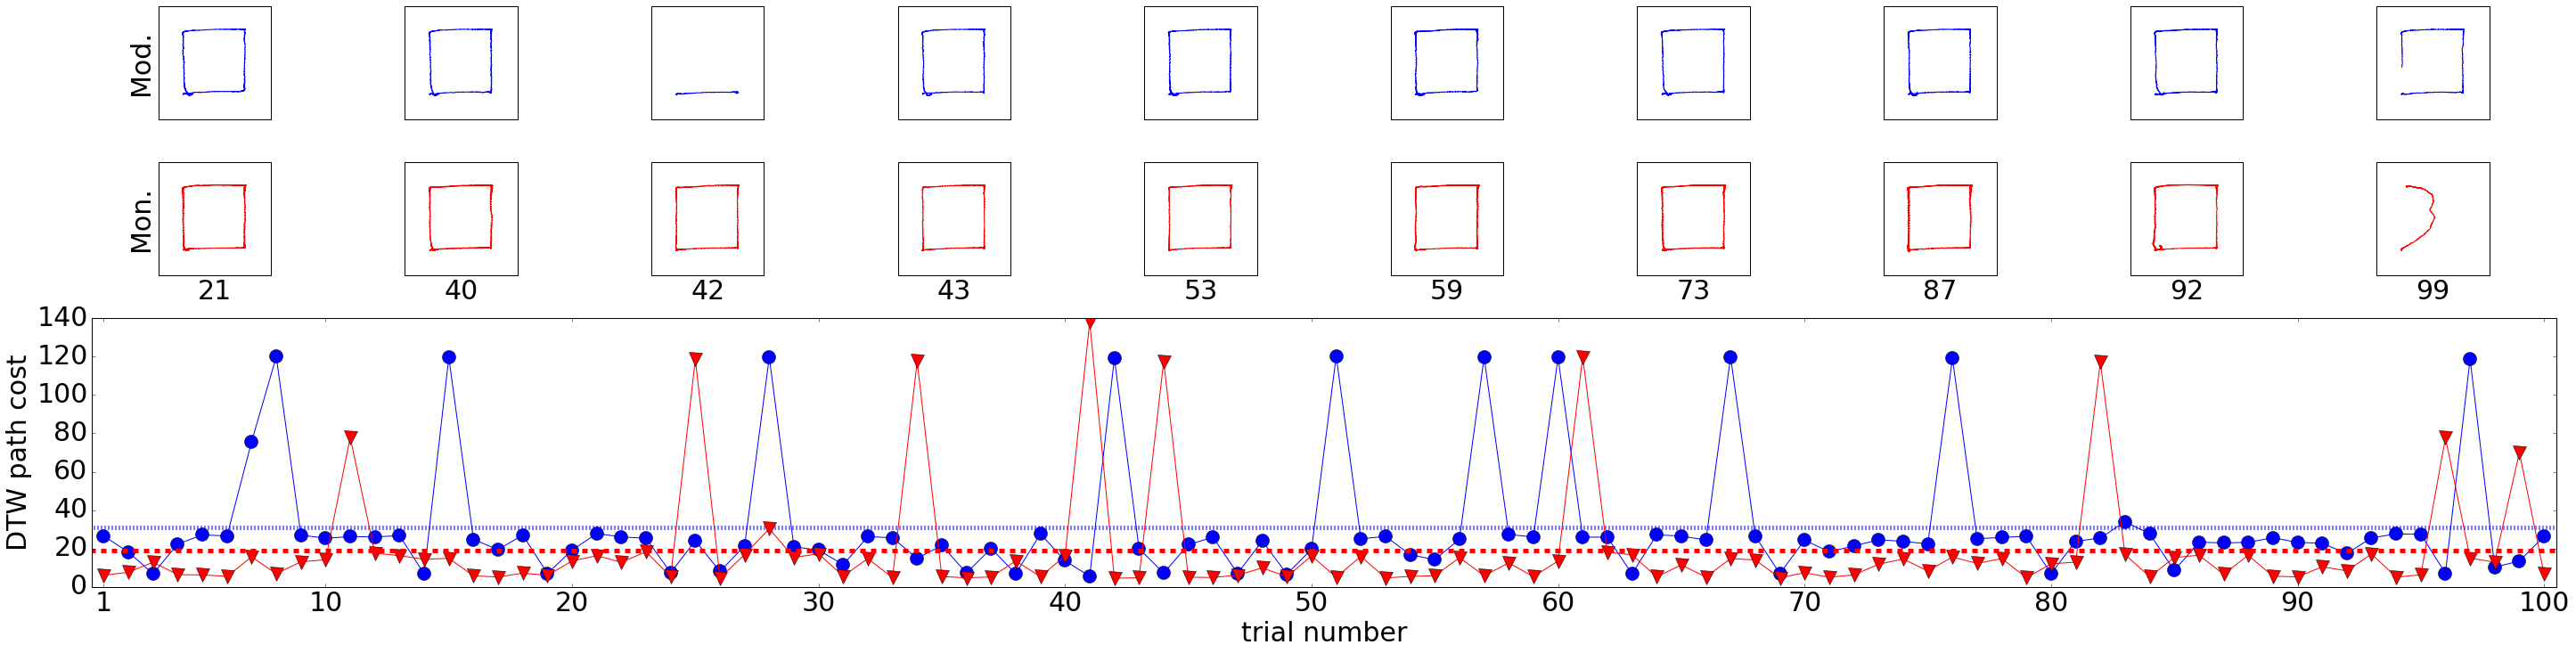

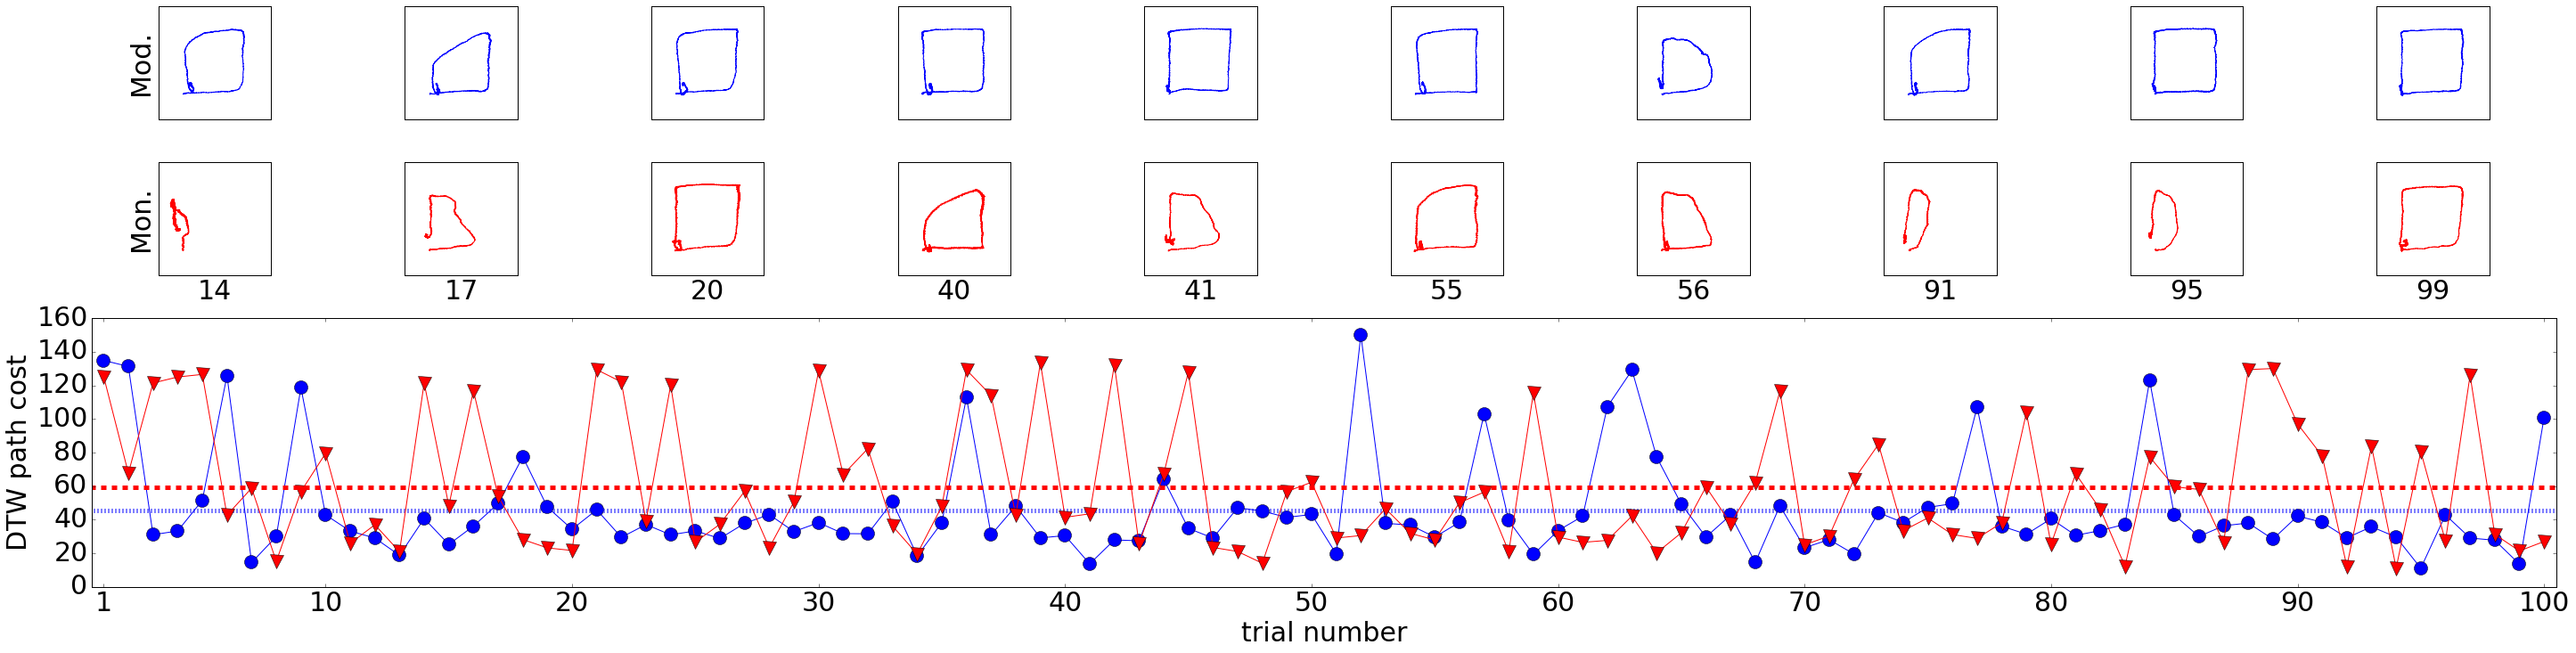

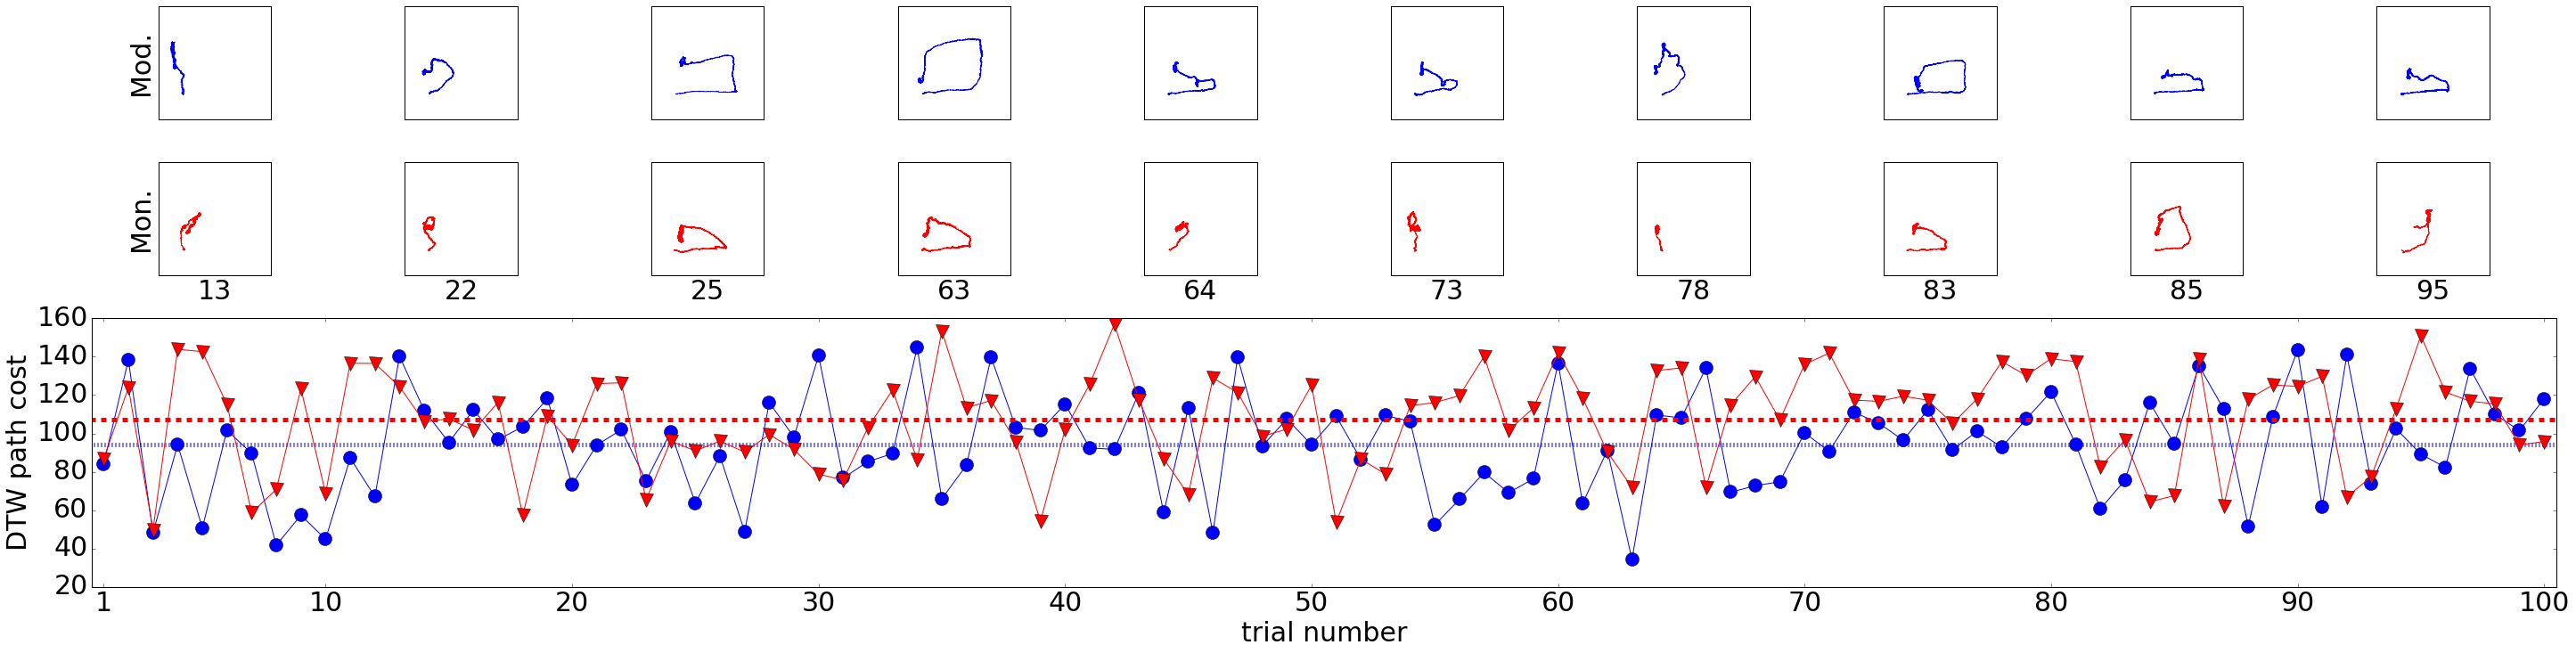

In [29]:
# 
# Using the sorted values from both approaches to generate the squares
#

font = {'weight' : 'normal',
        'size'   : 30}

matplotlib.rc('font', **font)

ax = []

for amount_noise in numpy.array(all_experiments)[[1,6,-1]]:


    filename = base_dir+"/"+sim_set+"/baxter_xyz_dtw_"+str(amount_noise)+".pickle"
    xyz_pos_mine,trials_cost_mine = slf.load_from_file(filename)

    filename = base_dir+"/"+sim_set+"/baxter_xyz_dtw__Maass_Parallel"+str(amount_noise)+".pickle"
    xyz_pos_maass,trials_cost_maass = slf.load_from_file(filename)

    
    plt.figure(figsize =(40,10))

    all_together = numpy.concatenate([trials_cost_mine,trials_cost_maass])
    all_together_ids = numpy.array(range(100)+range(100))

    sorted_mine=numpy.sort(all_together_ids[numpy.sort(all_together.argsort()[::20])])
    for i,si in zip(sorted_mine,range(10)):
        ax.append(plt.subplot2grid((4,10),(0, si)))
        ax[-1].plot(xyz_pos_mine[i,:,0],xyz_pos_mine[i,:,1],'b')
        ax[-1].tick_params(axis='both', pad=0, labelsize=0)
        ax[-1].tick_params(
                            axis='both', 
                            which='both', 
                            bottom='off', 
                            top='off', 
                            labelbottom='off', 
                            right='off', 
                            left='off', 
                            labelleft='off')
        ax[-1].set_xlim([-0.15,0.15])
        ax[-1].set_ylim([-0.15,0.15])
        ax[-1].set_aspect(1)
        if i==sorted_mine[0]:
            ax[-1].set_ylabel("Mod.",labelpad=5, fontdict={'fontsize':30})        

    sorted_maass=numpy.sort(all_together_ids[numpy.sort(all_together.argsort()[::20])])
    for i,si in zip(sorted_maass,range(10)):
        ax.append(plt.subplot2grid((4,10),(1, si)))
        ax[-1].plot(xyz_pos_maass[i,:,0],xyz_pos_maass[i,:,1],'r')
        ax[-1].tick_params(axis='y', pad=0, labelsize=0)
        ax[-1].tick_params(
                            axis='both', 
                            which='both', 
                            bottom='off', 
                            top='off', 
                            labelbottom='on', 
                            right='off', 
                            left='off', 
                            labelleft='off')
        ax[-1].set_xlim([-0.15,0.15])
        ax[-1].set_ylim([-0.15,0.15])
        ax[-1].set_aspect(1)    
        ax[-1].set_xticks([0])
        ax[-1].set_xticklabels([i+1])
        if i==sorted_maass[0]:
            ax[-1].set_ylabel("Mon.",labelpad=5, fontdict={'fontsize':30})
        
    plt.subplot2grid((4,10),(2, 0),colspan=10,rowspan=2)

    plt.plot(range(1,total_trials+1),trials_cost_mine,'bo-', markersize=15)
    plt.plot(range(0,total_trials+2),[numpy.mean(trials_cost_mine)]*(total_trials+2),'b:', linewidth=5)

    plt.plot(range(1,total_trials+1),trials_cost_maass,'rv-', markersize=15)
    plt.plot(range(0,total_trials+2),[numpy.mean(trials_cost_maass)]*(total_trials+2),'r--', linewidth=5)

    plt.xlim(0.5,total_trials+.5)
    plt.ylabel('DTW path cost')
    plt.xlabel('trial number')
    plt.xticks([0.5]+[1]+range(10,total_trials+1,10),['']+['1']+range(10,total_trials+1,10))
    # plt.ylim(-0.05,1.05)

    plt.tight_layout(pad=0, h_pad=0, w_pad=0, rect=None)
    plt.savefig(os.getcwd()+"/"+"dtw_path_cost_squares_"+amount_noise+".pdf", bbox_inches='tight',pad_inches=.1)


In [31]:
dtw_cost_mine = []
dtw_cost_maass = []
for amount_noise in all_experiments:
    # 0: '_ROB_0' => almost no noise
    # 1: "" => original noise (1nA)
    # 2: '_ROB_10'   =>  10% increase in noise
    # 3: '_ROB_20'   =>  20% increase in noise
    # 4: '_ROB_30'   =>  30% increase in noise
    # 5: '_ROB_40'   =>  40% increase in noise
    # 6: '_ROB_50'   =>  50% increase in noise
    # 7: '_ROB_60'   =>  60% increase in noise
    # 8: '_ROB_70'   =>  70% increase in noise
    # 9: '_ROB_80'   =>  80% increase in noise
    # 10: '_ROB_90'  =>  90% increase in noise
    # 11: '_ROB_100' => 100% increase in noise
    filename = base_dir+"/"+sim_set+"/baxter_xyz_dtw_"+str(amount_noise)+".pickle"
    _,trials_cost_mine = slf.load_from_file(filename)
    dtw_cost_mine.append(trials_cost_mine)

    filename = base_dir+"/"+sim_set+"/baxter_xyz_dtw__Maass_Parallel"+str(amount_noise)+".pickle"
    _,trials_cost_maass = slf.load_from_file(filename)
    dtw_cost_maass.append(trials_cost_maass)
    
dtw_cost_mine = numpy.array(dtw_cost_mine)
dtw_cost_maass = numpy.array(dtw_cost_maass)

In [32]:
print dtw_cost_mine[1].mean(),dtw_cost_maass[1].mean()
100-100*dtw_cost_maass[1].mean()/dtw_cost_mine[1].mean()

30.9336093283 18.9448769522


38.756332146285409

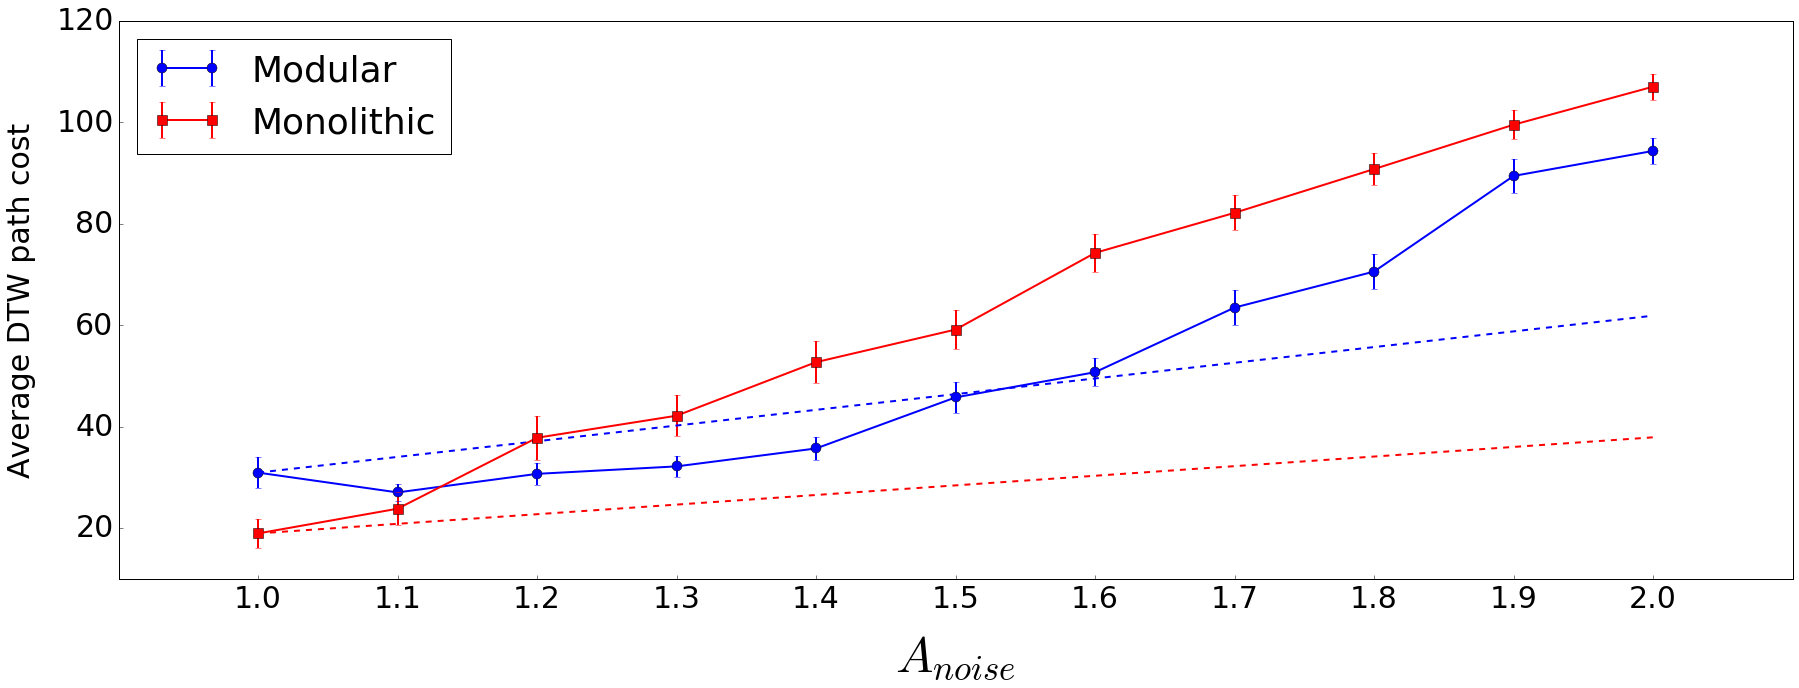

In [46]:
# Without the i_noise=0%
fig = plt.figure(figsize =(30,10))
ax = fig.add_subplot(111)

mine = numpy.copy(dtw_cost_mine[1:])
maass = numpy.copy(dtw_cost_maass[1:])

xlabels = ['']+[str(1+i/10.0) for i in range(21)]

ax.errorbar(range(len(mine)),mine.mean(axis=1),mine.std(axis=1)/numpy.sqrt(mine.shape[1]),\
            linestyle='-', marker='o', markersize=10, linewidth=2, color='b', label="Modular")

plt.plot(numpy.arange(len(mine)),numpy.array([mine.mean(axis=1)[0]]*len(mine))*numpy.linspace(1,2,num=11),\
         'b--',linewidth=2)

ax.errorbar(range(len(maass)),maass.mean(axis=1),maass.std(axis=1)/numpy.sqrt(maass.shape[1]),\
            linestyle='-', marker='s', markersize=10,linewidth=2, color='r', label="Monolithic")

plt.plot(numpy.arange(len(maass)),numpy.array([maass.mean(axis=1)[0]]*len(maass))*numpy.linspace(1,2,num=11),\
         'r--',linewidth=2)

# ax.tick_params(axis='x', pad=10)
# ax.tick_params(axis='y', pad=10)

# ax.tick_params(axis='both', labelsize=20)

font_labels = {'weight' : 'normal','size'   : 50}
ax.set_xlabel(r'$A_{noise}$',labelpad=20, fontdict=font_labels)
font_labels = {'weight' : 'normal','size'   : 30}
ax.set_ylabel('Average DTW path cost',labelpad=20, fontdict=font_labels)

# # ax.set_title("Square")
ax.set_autoscaley_on(False)
ax.set_xlim([-1,len(mine)])
ax.set_ylim([10,120])

ax.tick_params(
    axis='both', 
    which='both', 
    bottom='on', 
    top='off', 
    labelbottom='on',
    right='off', 
    left='on', 
    labelleft='on',
    pad=5, 
    labelsize=30)

ax.tick_params(
    axis='x',
    labelsize=30)

# ax.set_xticklabels(range(12),xlabels)
plt.xticks(range(-1,len(mine)),xlabels)#,rotation='vertical')

plt.legend(loc=2)

plt.savefig(os.getcwd()+"/"+"dtw_path_cost_100to200_squares_average_stderr.pdf", bbox_inches='tight',pad_inches=.1)
    
plt.show()